In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
file_path = 'cement_prices.csv'

# Read the CSV file into a DataFrame
historical_cement_prices = pd.read_csv(file_path)
historical_cement_prices

,id,price_updated_by,competitor_structure_id,market_id,company_id,current_price,new_price,transaction_status,comment,action_by_id,last_approved_price,visability,serviceUpdate,no_change,createdDate,action_date,createdAt,updatedAt,deletedAt,competitors_structure_id
0,26227,NaN,340,157,146,0.0,0.0,2,NaN,NaN,NaN,NaN,1.0,NaN,'2022-05-24 21:01:10',NaN,'2022-05-24 21:01:10','2023-06-19 14:05:15',NaN,NaN
1,26228,NaN,341,157,146,0.0,0.0,2,NaN,NaN,NaN,NaN,1.0,NaN,'2022-05-24 21:01:11',NaN,'2022-05-24 21:01:11','2023-06-19 14:05:15',NaN,NaN
2,26229,NaN,342,157,146,0.0,0.0,2,NaN,NaN,NaN,NaN,1.0,NaN,'2022-05-24 21:01:12',NaN,'2022-05-24 21:01:12','2023-06-19 14:05:15',NaN,NaN
3,26277,NaN,340,157,146,0.0,0.0,2,NaN,NaN,NaN,NaN,1.0,NaN,'2022-05-25 21:01:10',NaN,'2022-05-25 21:01:10','2023-06-19 14:05:15',NaN,NaN
4,26278,NaN,341,157,146,0.0,0.0,2,NaN,NaN,NaN,NaN,1.0,NaN,'2022-05-25 21:01:11',NaN,'2022-05-25 21:01:11','2023-06-19 14:05:15',NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121077,266108,431.0,397,152,146,2140.0,2140.0,1,NaN,NaN,2140.0,1.0,NaN,0.0,'2023-12-11 11:06:14',NaN,'2023-12-11 11:06:14','2023-12-11 11:06:14',NaN,NaN
121078,266109,431.0,1071,152,146,2120.0,2120.0,1,NaN,NaN,2120.0,1.0,NaN,0.0,'2023-12-11 11:06:14',NaN,'2023-12-11 11:06:14','2023-12-11 11:06:14',NaN,NaN
121079,266110,431.0,1073,152,146,2120.0,2120.0,1,NaN,NaN,2120.0,1.0,NaN,0.0,'2023-12-11 11:06:14',NaN,'2023-12-11 11:06:14','2023-12-11 11:06:14',NaN,NaN
121080,266111,431.0,628,152,146,2120.0,2120.0,1,NaN,NaN,2120.0,1.0,NaN,0.0,'2023-12-11 11:06:14',NaN,'2023-12-11 11:06:14','2023-12-11 11:06:14',NaN,NaN


In [29]:
historical_cement_prices = historical_cement_prices[historical_cement_prices['new_price'] > 1]
historical_cement_prices = historical_cement_prices[historical_cement_prices['transaction_status'] != 0]
historical_cement_prices.reset_index(drop=True, inplace=True)
historical_cement_prices['competitor_structure_id'] = historical_cement_prices['competitor_structure_id'].astype(str)
historical_cement_prices.dtypes

id                            int64
price_updated_by            float64
competitor_structure_id      object
market_id                     int64
company_id                    int64
current_price               float64
new_price                   float64
transaction_status            int64
comment                      object
action_by_id                float64
last_approved_price         float64
visability                  float64
serviceUpdate               float64
no_change                   float64
createdDate                  object
action_date                  object
createdAt                    object
updatedAt                    object
deletedAt                    object
competitors_structure_id    float64
dtype: object

In [30]:
columns_to_drop = ['comment','visability','serviceUpdate', 'no_change','deletedAt','id', 'price_updated_by', 'action_by_id', 'action_date', 'createdAt', 'updatedAt', 'deletedAt', 'competitors_structure_id']
historical_cement_prices = historical_cement_prices.drop(columns_to_drop, axis=1)
historical_cement_prices 

,competitor_structure_id,market_id,company_id,current_price,new_price,transaction_status,last_approved_price,createdDate
0,428,147,146,1300.0,1300.0,2,1300.0,'2022-06-01 10:22:08'
1,429,147,146,1300.0,1300.0,2,1300.0,'2022-06-01 10:22:11'
2,428,147,146,1300.0,1300.0,2,1300.0,'2022-06-01 10:25:54'
3,429,147,146,1300.0,1300.0,2,1300.0,'2022-06-01 10:25:57'
4,419,147,146,1260.0,1260.0,2,1260.0,'2022-06-01 10:26:04'
...,...,...,...,...,...,...,...,...
118734,397,152,146,2140.0,2140.0,1,2140.0,'2023-12-11 11:06:14'
118735,1071,152,146,2120.0,2120.0,1,2120.0,'2023-12-11 11:06:14'
118736,1073,152,146,2120.0,2120.0,1,2120.0,'2023-12-11 11:06:14'
118737,628,152,146,2120.0,2120.0,1,2120.0,'2023-12-11 11:06:14'


In [31]:
historical_cement_prices.dtypes

competitor_structure_id     object
market_id                    int64
company_id                   int64
current_price              float64
new_price                  float64
transaction_status           int64
last_approved_price        float64
createdDate                 object
dtype: object

In [32]:
historical_cement_prices['createdDate'] = pd.to_datetime(historical_cement_prices['createdDate'])
historical_cement_prices['createdDate'] = historical_cement_prices['createdDate'].dt.strftime('%Y-%m-%d')
historical_cement_prices

,competitor_structure_id,market_id,company_id,current_price,new_price,transaction_status,last_approved_price,createdDate
0,428,147,146,1300.0,1300.0,2,1300.0,2022-06-01
1,429,147,146,1300.0,1300.0,2,1300.0,2022-06-01
2,428,147,146,1300.0,1300.0,2,1300.0,2022-06-01
3,429,147,146,1300.0,1300.0,2,1300.0,2022-06-01
4,419,147,146,1260.0,1260.0,2,1260.0,2022-06-01
...,...,...,...,...,...,...,...,...
118734,397,152,146,2140.0,2140.0,1,2140.0,2023-12-11
118735,1071,152,146,2120.0,2120.0,1,2120.0,2023-12-11
118736,1073,152,146,2120.0,2120.0,1,2120.0,2023-12-11
118737,628,152,146,2120.0,2120.0,1,2120.0,2023-12-11


In [33]:
historical_cement_prices = historical_cement_prices.groupby(['competitor_structure_id', 'createdDate'])['current_price', 'new_price'].mean().reset_index()
print(historical_cement_prices)

C:\Users\George Welson\AppData\Local\Temp\ipykernel_25108\1633497698.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  historical_cement_prices = historical_cement_prices.groupby(['competitor_structure_id', 'createdDate'])['current_price', 'new_price'].mean().reset_index()


,competitor_structure_id,createdDate,current_price,new_price
0,1066,2022-09-13,1425.0,1425.0
1,1066,2022-09-14,1425.0,1425.0
2,1066,2022-09-15,1425.0,1425.0
3,1066,2022-09-16,1425.0,1425.0
4,1066,2022-09-17,1425.0,1425.0
...,...,...,...,...
101414,814,2023-12-06,2070.0,2070.0
101415,814,2023-12-07,2070.0,2070.0
101416,814,2023-12-08,2070.0,2070.0
101417,814,2023-12-09,2070.0,2070.0


In [37]:
filtered_df = historical_cement_prices[historical_cement_prices['competitor_structure_id'] == "428"]

print(filtered_df)
 

      competitor_structure_id createdDate  current_price  new_price
41420                     428  2022-06-01         1300.0     1300.0
41421                     428  2022-06-02         1300.0     1300.0
41422                     428  2022-06-03         1300.0     1300.0
41423                     428  2022-06-05         1300.0     1300.0
41424                     428  2022-06-06         1300.0     1300.0
...                       ...         ...            ...        ...
41967                     428  2023-12-06         2110.0     2110.0
41968                     428  2023-12-07         2110.0     2110.0
41969                     428  2023-12-08         2110.0     2110.0
41970                     428  2023-12-09         2110.0     2110.0
41971                     428  2023-12-10         2110.0     2110.0

[552 rows x 4 columns]


In [15]:
historical_cement_prices.describe()

,competitor_structure_id,current_price,new_price
count,101419.000000,101419.000000,101419.000000
mean,581.668731,1721.332418,1721.529542
std,237.185650,264.158060,262.737299
min,340.000000,0.000000,878.500000
25%,421.000000,1520.000000,1520.000000
50%,525.000000,1750.000000,1750.000000
75%,633.000000,1900.000000,1895.000000
max,1225.000000,22150.000000,22150.000000


In [17]:
historical_cement_prices.competitor_structure_id.value_counts()

417     554
452     553
420     553
421     553
423     553
       ... 
1175     28
1185     26
1170     22
1225     22
1186      1
Name: competitor_structure_id, Length: 245, dtype: int64

In [22]:
filtered_df.dtypes

competitor_structure_id      int64
createdDate                 object
current_price              float64
new_price                  float64
dtype: object

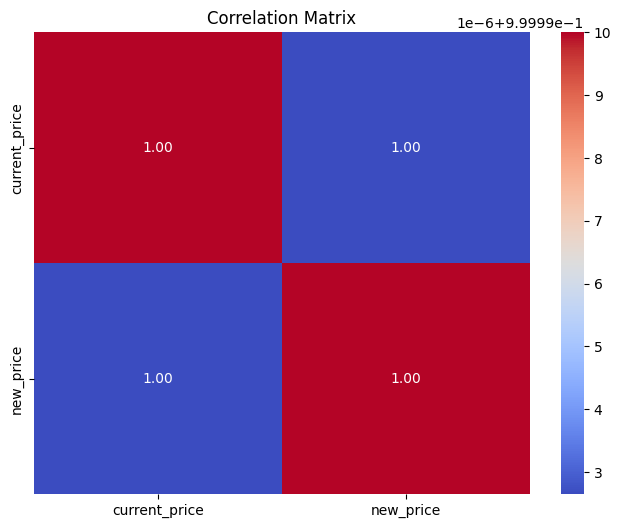

In [36]:
correlation_matrix = filtered_df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()